In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline




In [71]:
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')

In [72]:
train.shape, test.shape

((1460, 80), (1459, 79))

In [73]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [75]:
dict_with_null = {}
for col in train.columns:
    if train[col].isnull().sum() > 0:
        dict_with_null[col] = train[col].isnull().sum()/train.shape[0]
sorted (dict_with_null)
dict_with_null

{'LotFrontage': 0.1773972602739726,
 'Alley': 0.9376712328767123,
 'MasVnrType': 0.005479452054794521,
 'MasVnrArea': 0.005479452054794521,
 'BsmtQual': 0.025342465753424658,
 'BsmtCond': 0.025342465753424658,
 'BsmtExposure': 0.026027397260273973,
 'BsmtFinType1': 0.025342465753424658,
 'BsmtFinType2': 0.026027397260273973,
 'Electrical': 0.0006849315068493151,
 'FireplaceQu': 0.4726027397260274,
 'GarageType': 0.05547945205479452,
 'GarageYrBlt': 0.05547945205479452,
 'GarageFinish': 0.05547945205479452,
 'GarageQual': 0.05547945205479452,
 'GarageCond': 0.05547945205479452,
 'PoolQC': 0.9952054794520548,
 'Fence': 0.8075342465753425,
 'MiscFeature': 0.963013698630137}

In [76]:
columns_deleted = [col for col in train.columns if train[col].isnull().sum()/train.shape[0]>0.8]
columns_deleted

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [77]:
dict_with_null_2 = {}
for col in test.columns:
    if test[col].isnull().sum() > 0:
        dict_with_null_2[col] = test[col].isnull().sum()/test.shape[0]
sorted (dict_with_null_2)
dict_with_null_2

{'MSZoning': 0.0027416038382453737,
 'LotFrontage': 0.15558601782042494,
 'Alley': 0.9266620973269363,
 'Utilities': 0.0013708019191226869,
 'Exterior1st': 0.0006854009595613434,
 'Exterior2nd': 0.0006854009595613434,
 'MasVnrType': 0.010966415352981495,
 'MasVnrArea': 0.01028101439342015,
 'BsmtQual': 0.03015764222069911,
 'BsmtCond': 0.030843043180260453,
 'BsmtExposure': 0.03015764222069911,
 'BsmtFinType1': 0.02878684030157642,
 'BsmtFinSF1': 0.0006854009595613434,
 'BsmtFinType2': 0.02878684030157642,
 'BsmtFinSF2': 0.0006854009595613434,
 'BsmtUnfSF': 0.0006854009595613434,
 'TotalBsmtSF': 0.0006854009595613434,
 'BsmtFullBath': 0.0013708019191226869,
 'BsmtHalfBath': 0.0013708019191226869,
 'KitchenQual': 0.0006854009595613434,
 'Functional': 0.0013708019191226869,
 'FireplaceQu': 0.5003427004797807,
 'GarageType': 0.0520904729266621,
 'GarageYrBlt': 0.053461274845784786,
 'GarageFinish': 0.053461274845784786,
 'GarageCars': 0.0006854009595613434,
 'GarageArea': 0.00068540095956

In [78]:
train.drop(columns_deleted, axis=1, inplace=True)
test.drop(columns_deleted, axis=1, inplace=True)

In [79]:
train.shape, test.shape

((1460, 76), (1459, 75))

In [80]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print(corr_matrix.columns[i], corr_matrix.columns[j])
                #colname = corr_matrix.columns[i] # getting the name of column
                #print (colname)
                #col_corr.add(colname)
                #if colname in dataset.columns:
                #    del dataset[colname] # deleting the column from the dataset

#print(dataset)
correlation(train, 0.7)

1stFlrSF TotalBsmtSF
TotRmsAbvGrd GrLivArea
GarageYrBlt YearBuilt
GarageArea GarageCars
SalePrice OverallQual
SalePrice GrLivArea


In [81]:
#Delete highcorrelated features
high_corr_feat = ['TotalBsmtSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars']
train.drop(high_corr_feat, axis=1, inplace=True)
test.drop(high_corr_feat, axis=1, inplace=True)

In [82]:
train.shape, test.shape

((1460, 72), (1459, 71))

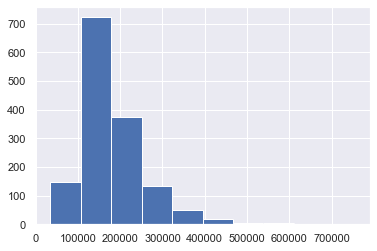

In [83]:
train['SalePrice'].hist()

In [84]:
dict_with_null_num = {}
for col in train.columns:
    if train[col].isnull().sum() > 0 and train[col].dtype in ['int64', 'float64']:
        dict_with_null_num[col] = train[col].isnull().sum()/train.shape[0]
sorted (dict_with_null_num)
dict_with_null_num

{'LotFrontage': 0.1773972602739726, 'MasVnrArea': 0.005479452054794521}

In [85]:
dict_with_null_num_2 = {}
for col in test.columns:
    if test[col].isnull().sum() > 0 and test[col].dtype in ['int64', 'float64']:
        dict_with_null_num_2[col] = test[col].isnull().sum()/test.shape[0]
sorted (dict_with_null_num_2)
dict_with_null_num_2

{'LotFrontage': 0.15558601782042494,
 'MasVnrArea': 0.01028101439342015,
 'BsmtFinSF1': 0.0006854009595613434,
 'BsmtFinSF2': 0.0006854009595613434,
 'BsmtUnfSF': 0.0006854009595613434,
 'BsmtFullBath': 0.0013708019191226869,
 'BsmtHalfBath': 0.0013708019191226869,
 'GarageArea': 0.0006854009595613434}

In [86]:

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())

    
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].median())
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].median())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].median())


In [87]:
dict_with_null_num_2 = {}
for col in test.columns:
    if test[col].isnull().sum() > 0 and test[col].dtype in ['int64', 'float64']:
        dict_with_null_num_2[col] = test[col].isnull().sum()/test.shape[0]
sorted (dict_with_null_num_2)
dict_with_null_num_2

{}

In [88]:
y = np.log(train['SalePrice'].values)
train = train.drop(['SalePrice'], axis=1)

In [89]:
data = pd.concat([train, test], axis = 0)

In [90]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

In [91]:
data_cols = pd.get_dummies(data[cat_cols], drop_first=True)
data_cols

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2916,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2917,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [92]:
data_without_cat = data.drop(cat_cols, axis=1)
data_without_cat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006


In [95]:
data_cols.tail()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
2915,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2916,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2917,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2918,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2919,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [96]:
data_full = pd.concat([data_without_cat, data_cols], axis=1)
data_full

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [97]:
train = data_full[:len(train)]
test = data_full[len(train):]
train.shape, test.shape

((1460, 232), (1459, 232))

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size=0.2, random_state = 42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_valid_scaled = ss.transform(X_valid)
y_train = np.array(y_train)

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rfc = RandomForestRegressor(random_state=42)
rfc.fit(X_train_scaled, y_train)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

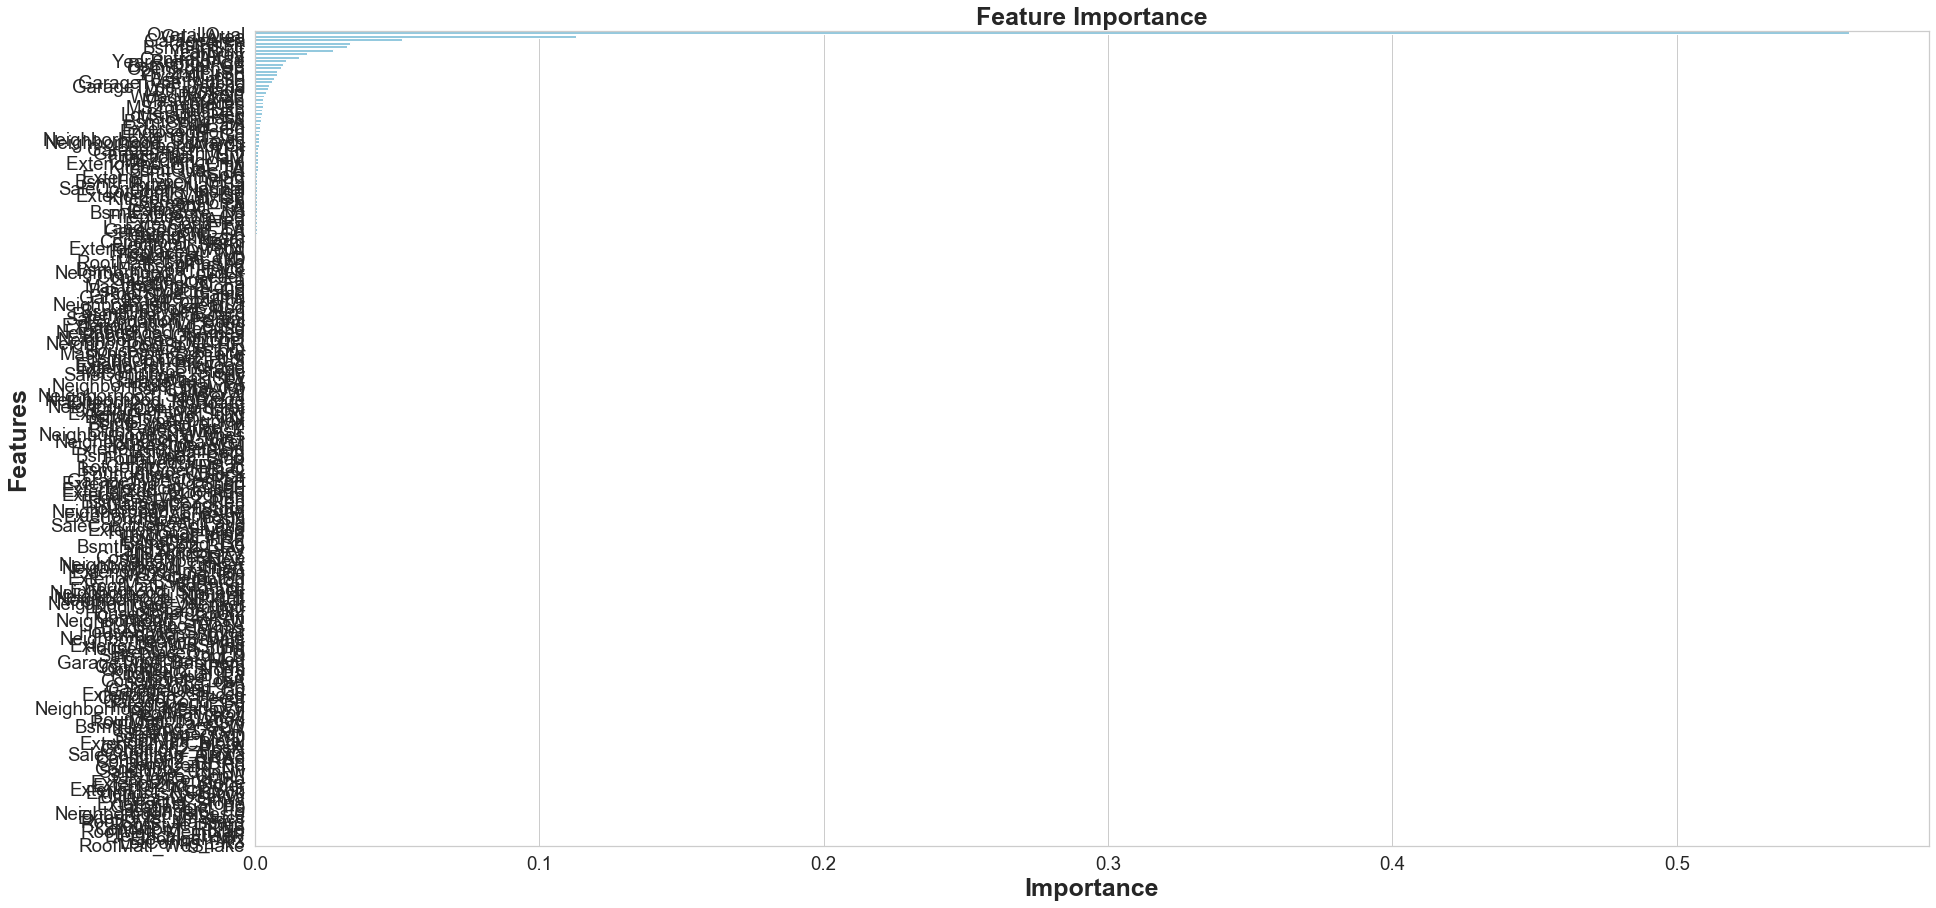

None

,Features,Gini-Importance
0,OverallQual,0.560562
1,GrLivArea,0.112938
2,GarageArea,0.051580
3,1stFlrSF,0.033397
4,BsmtFinSF1,0.032321
5,YearBuilt,0.027457
6,LotArea,0.018316
7,CentralAir_Y,0.015562
8,YearRemodAdd,0.010909
9,BsmtQual_Gd,0.009929


Features           OverallQualGrLivAreaGarageArea1stFlrSFBsmtFinS...
Gini-Importance                                             0.930768
dtype: object

In [104]:
feats = {}
for feature, importance in zip(train.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances.head(20))
display(importances.head(20).sum())

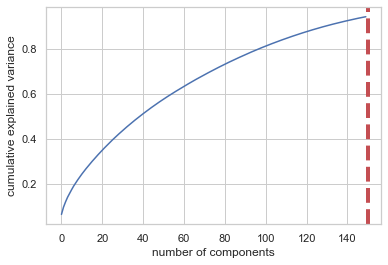

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.063230,0.063230
1,0.095343,0.032113
2,0.118923,0.023580
3,0.139695,0.020772
4,0.157238,0.017543
5,0.173785,0.016547
6,0.189680,0.015894
7,0.203758,0.014078
8,0.217348,0.013590
9,0.230354,0.013006


In [110]:
pca_test = PCA(n_components=150)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=150, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(50))

In [111]:
pca = PCA(n_components=150)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_valid_scaled_pca = pca.transform(X_valid_scaled)

In [113]:
rfc = RandomForestRegressor()
rfc.fit(X_train_scaled_pca, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [114]:
pred_valid = rfc.predict(X_valid_scaled_pca)

In [115]:
y_valid_exp = np.exp(y_valid)
pred_valid_exp = np.exp(pred_valid)
y_valid_exp, pred_valid_exp

(array([154500., 325000., 115000., 159000., 315500.,  75500., 311500.,
        146000.,  84500., 135500., 145000., 130000.,  81000., 214000.,
        181000., 134500., 183500., 135000., 118400., 226000., 155000.,
        210000., 173500., 129000., 192000., 153900., 181134., 141000.,
        181000., 208900., 127000., 284000., 200500., 135750., 255000.,
        140000., 138000., 219500., 310000.,  97000., 114500., 205000.,
        119500., 253293., 128500., 117500., 115000., 127000., 451950.,
        144000., 119000., 196000., 115000., 287000., 144500., 260000.,
        213000., 175000., 107000., 107500.,  68500., 154000., 317000.,
        264132., 283463., 243000., 109000., 305000.,  93500., 176000.,
        118858., 134000., 109008.,  93500., 611657., 173000., 348000.,
        341000., 141000., 124900., 118000.,  67000., 113000.,  91300.,
        149500., 133000., 266000., 190000., 155900., 155835., 153500.,
        152000., 124500., 301000., 136500., 169990., 205000., 183900.,
      

In [116]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid_exp, pred_valid_exp)
##RF

23519.072097905962

In [117]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate = 0.05, max_depth = 3, n_estimators = 1500)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

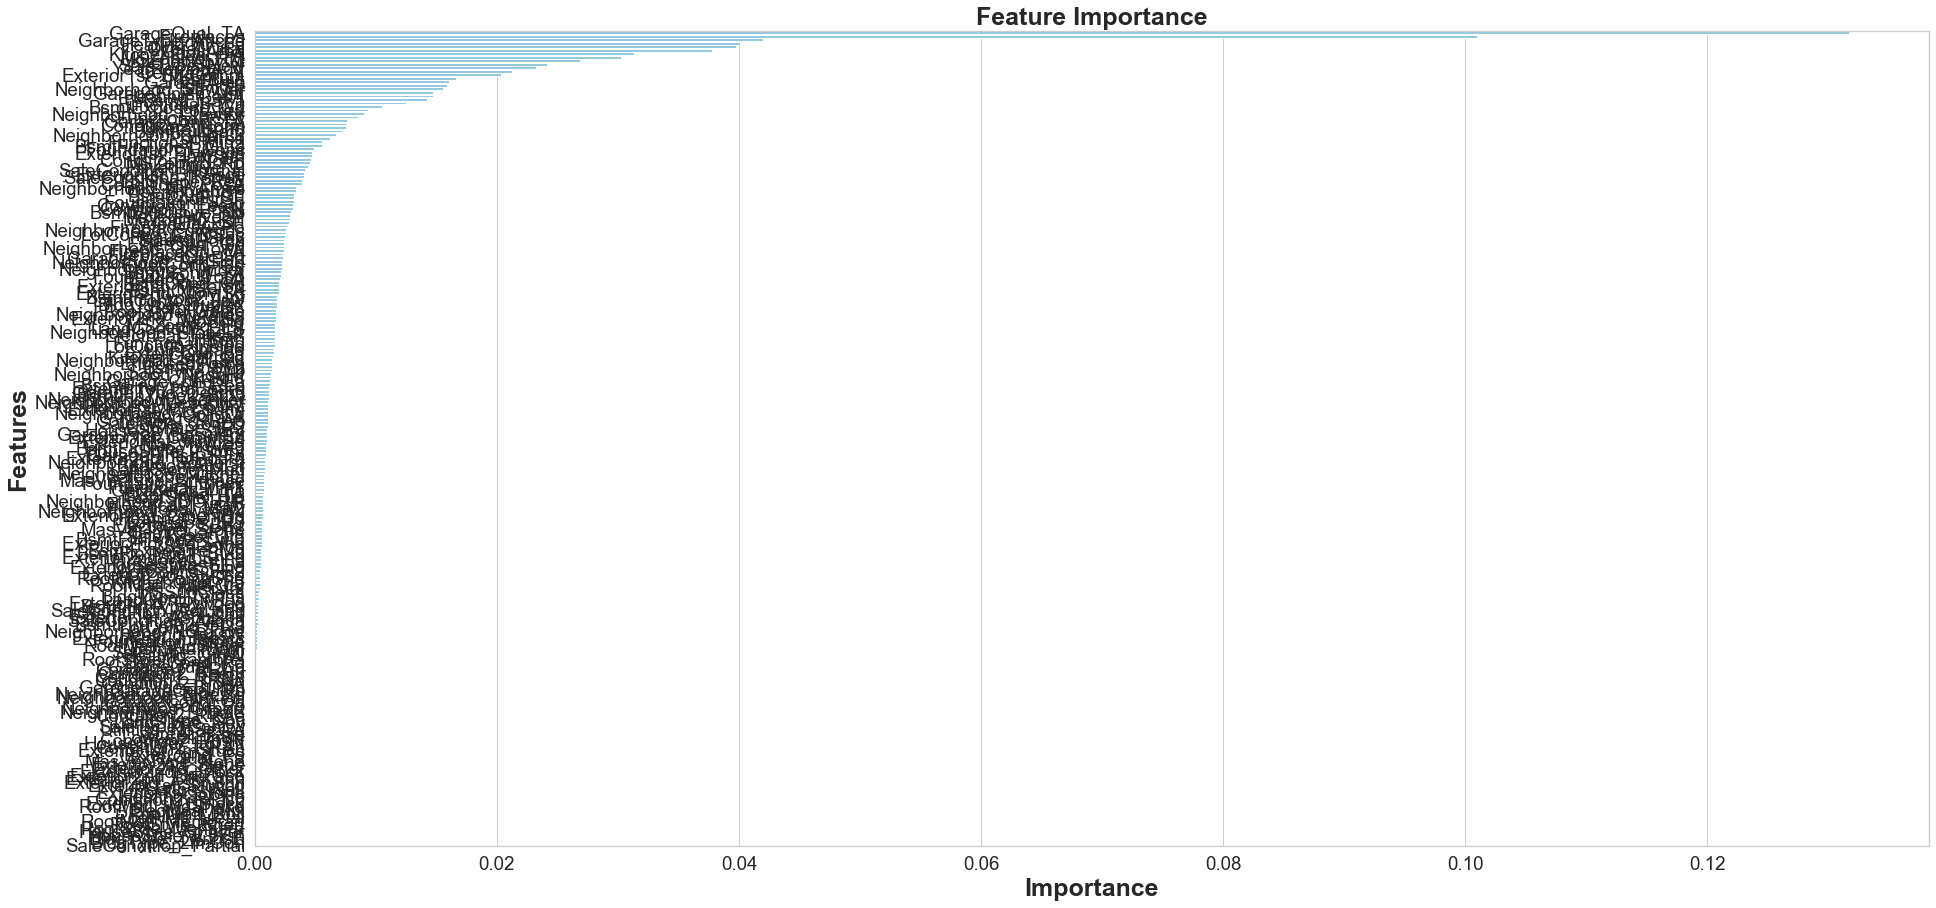

None

,Features,Gini-Importance
0,GarageQual_TA,0.131725
1,Fireplaces,0.100939
2,GarageType_Attchd,0.041987
3,HeatingQC_Fa,0.040097
4,OverallQual,0.039722
5,GrLivArea,0.037791
6,KitchenQual_TA,0.031321
7,MSZoning_RM,0.030217
8,KitchenAbvGr,0.026902
9,SaleType_New,0.024140


Features           GarageQual_TAFireplacesGarageType_AttchdHeatin...
Gini-Importance                                             0.677411
dtype: object

In [118]:
feats = {}
for feature, importance in zip(train.columns, xgb.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances.head(20))
display(importances.head(20).sum())

In [119]:
pca = PCA(n_components=150)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_valid_scaled_pca = pca.transform(X_valid_scaled)

In [120]:
xgb.fit(X_train_scaled_pca, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [122]:
X_test_scaled = ss.transform(test)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [123]:
pred_test_xgb = xgb.predict(X_test_scaled_pca)

pred_test_xgb_exp = np.exp(pred_test_xgb)
pred_test_xgb_exp

array([127627.75, 146982.44, 181055.31, ..., 163000.22, 119956.83,
       195191.05], dtype=float32)

In [124]:
output = pd.DataFrame({'Id': test.index,
                       'SalePrice': pred_test_xgb_exp})
output.to_csv('submission_new3.csv', index=False)
#MAE 18000